In [1]:
import numpy as np  # type:ignore
import pandas as pd  # type:ignore
import torch  # type:ignore
from torch.utils.data import DataLoader  # type:ignore
from torchvision import transforms  # type:ignore
from torchvision.datasets import CIFAR10  # type:ignore
import sys
sys.path.append("../")
from PyTorch_CIFAR10.cifar10_models.mobilenetv2 import mobilenet_v2
from PyTorch_CIFAR10.UTILS_TORCH import *

ModuleNotFoundError: No module named 'PyTorch_CIFAR10.UTILS_TORCH'

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Currently using: '{device}'")

Currently using: 'cuda'


In [3]:
# Hyperparameters
NUM_EPOCHS = 100
BATCH_SIZE = 64
LEARN_RATE = 0.001
ALPHA = 0.1  # distillation_loss
TEMP = 3.0
OVERLAY_PROB = 0.25
GAMMAS = [0.5]
# GAMMAS = [0.1, 0.25, 0.5, 0.75, 0.9]
NUM_WORKERS = 16
SAVE = "Histories/Results/AT.csv"
IGS = "../PyTorch_CIFAR10/Captum_IGs.npy"

In [4]:
precomputed_logits = np.load("../PyTorch_CIFAR10/data/cifar10_logits.npy")
print("Shape of teacher_logits:", precomputed_logits.shape)

precomputed_attn = np.load("../PyTorch_CIFAR10/data/cifar10_attention_maps.npy")
print("Shape of teacher_logits:", precomputed_attn.shape)

igs = np.load(IGS)

Shape of teacher_logits: (50000, 10)
Shape of teacher_logits: (50000, 8, 8)


In [5]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(
        #     mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        # ),
    ]
)

student_aug = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize(
        #     mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        # ),
    ]
)

In [6]:
train_dataset = CIFAR10WithIG(
    igs=igs,
    root="../PyTorch_CIFAR10/data",
    train=True,
    transform=student_aug,
    overlay_prob=OVERLAY_PROB,
    return_ig=False,
    precomputed_logits=precomputed_logits,
    precomputed_attn=precomputed_attn,
)

# Load the data into batches
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=False,
    persistent_workers=True,
)

# load student data
test_data = CIFAR10(
    root="../PyTorch_CIFAR10/data",
    train=False,
    download=False,
    transform=transform,
)

test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=False,
    persistent_workers=True,
)

Files already downloaded and verified


In [7]:
Student = ModifiedStudent(mobilenet_v2(pretrained=False))
Student.to(device);

In [8]:
_, acc = train_eval_AT(
    student=Student,
    train_loader=train_loader,
    test_loader=test_loader,
    epochs=NUM_EPOCHS,
    lr=LEARN_RATE,
    TEMP=TEMP,
    ALPHA=ALPHA,
    GAMMA=GAMMAS[0],
    device=device,
    csv_path=f"../PyTorch_CIFAR10/Histories/Testing/AT_{ALPHA}_{TEMP}_{GAMMAS[0]}.csv",
)

Epoch 1/100: Loss: 1.7932,            Accuracy: 44.13%


Epoch 2/100: Loss: 1.4488,            Accuracy: 61.61%


Epoch 3/100: Loss: 1.2859,            Accuracy: 69.21%


Epoch 4/100: Loss: 1.1928,            Accuracy: 73.37%


Epoch 5/100: Loss: 1.1289,            Accuracy: 76.09%


Epoch 6/100: Loss: 1.0829,            Accuracy: 78.19%


Epoch 7/100: Loss: 1.0426,            Accuracy: 79.77%


Epoch 8/100: Loss: 1.0108,            Accuracy: 81.22%


Epoch 9/100: Loss: 0.9787,            Accuracy: 82.70%


Epoch 10/100: Loss: 0.9612,            Accuracy: 83.31%


Epoch 11/100: Loss: 0.9343,            Accuracy: 84.52%


Epoch 12/100: Loss: 0.9201,            Accuracy: 85.14%


Epoch 13/100: Loss: 0.9052,            Accuracy: 85.71%


Epoch 14/100: Loss: 0.8863,            Accuracy: 86.42%


Epoch 15/100: Loss: 0.8730,            Accuracy: 86.94%


Epoch 16/100: Loss: 0.8609,            Accuracy: 87.45%


Epoch 17/100: Loss: 0.8491,            Accuracy: 87.84%


Epoch 18/100: Loss: 0.8380,            Accuracy: 88.37%


Epoch 19/100: Loss: 0.8268,            Accuracy: 89.00%


Epoch 20/100: Loss: 0.8186,            Accuracy: 89.21%


Epoch 21/100: Loss: 0.8063,            Accuracy: 89.80%


Epoch 22/100: Loss: 0.7996,            Accuracy: 89.97%


Epoch 23/100: Loss: 0.7953,            Accuracy: 90.23%


Epoch 24/100: Loss: 0.7849,            Accuracy: 90.76%


Epoch 25/100: Loss: 0.7794,            Accuracy: 90.86%


Epoch 26/100: Loss: 0.7719,            Accuracy: 91.15%


Epoch 27/100: Loss: 0.7673,            Accuracy: 91.30%


Epoch 28/100: Loss: 0.7593,            Accuracy: 91.75%


Epoch 29/100: Loss: 0.7550,            Accuracy: 91.89%


Epoch 30/100: Loss: 0.7500,            Accuracy: 92.05%


Epoch 31/100: Loss: 0.7447,            Accuracy: 92.22%


Epoch 32/100: Loss: 0.7410,            Accuracy: 92.44%


Epoch 33/100: Loss: 0.7367,            Accuracy: 92.47%


Epoch 34/100: Loss: 0.7334,            Accuracy: 92.69%


Epoch 35/100: Loss: 0.7229,            Accuracy: 93.20%


Epoch 36/100: Loss: 0.7207,            Accuracy: 93.29%


Epoch 37/100: Loss: 0.7171,            Accuracy: 93.27%


Epoch 38/100: Loss: 0.7142,            Accuracy: 93.39%


Epoch 39/100: Loss: 0.7109,            Accuracy: 93.58%


Epoch 40/100: Loss: 0.7086,            Accuracy: 93.66%


Epoch 41/100: Loss: 0.7028,            Accuracy: 94.01%


Epoch 42/100: Loss: 0.7020,            Accuracy: 93.95%


Epoch 43/100: Loss: 0.6974,            Accuracy: 94.25%


Epoch 44/100: Loss: 0.6938,            Accuracy: 94.29%


Epoch 45/100: Loss: 0.6902,            Accuracy: 94.63%


Epoch 46/100: Loss: 0.6878,            Accuracy: 94.53%


Epoch 47/100: Loss: 0.6890,            Accuracy: 94.49%


Epoch 48/100: Loss: 0.6802,            Accuracy: 94.84%


Epoch 49/100: Loss: 0.6809,            Accuracy: 94.81%


Epoch 50/100: Loss: 0.6802,            Accuracy: 94.92%


Epoch 51/100: Loss: 0.6731,            Accuracy: 95.12%


Epoch 52/100: Loss: 0.6734,            Accuracy: 95.07%


Epoch 53/100: Loss: 0.6745,            Accuracy: 95.12%


Epoch 54/100: Loss: 0.6691,            Accuracy: 95.27%


Epoch 55/100: Loss: 0.6651,            Accuracy: 95.51%


Epoch 56/100: Loss: 0.6650,            Accuracy: 95.42%


Epoch 57/100: Loss: 0.6632,            Accuracy: 95.54%


Epoch 58/100: Loss: 0.6619,            Accuracy: 95.51%


Epoch 59/100: Loss: 0.6573,            Accuracy: 95.78%


Epoch 60/100: Loss: 0.6563,            Accuracy: 95.74%


Epoch 61/100: Loss: 0.6540,            Accuracy: 95.95%


Epoch 62/100: Loss: 0.6542,            Accuracy: 95.93%


Epoch 63/100: Loss: 0.6511,            Accuracy: 96.00%


Epoch 64/100: Loss: 0.6497,            Accuracy: 96.15%


Epoch 65/100: Loss: 0.6480,            Accuracy: 96.19%


Epoch 66/100: Loss: 0.6458,            Accuracy: 96.24%


Epoch 67/100: Loss: 0.6451,            Accuracy: 96.26%


Epoch 68/100: Loss: 0.6416,            Accuracy: 96.42%


Epoch 69/100: Loss: 0.6412,            Accuracy: 96.34%


Epoch 70/100: Loss: 0.6390,            Accuracy: 96.48%


Epoch 71/100: Loss: 0.6365,            Accuracy: 96.53%


Epoch 72/100: Loss: 0.6375,            Accuracy: 96.49%


Epoch 73/100: Loss: 0.6360,            Accuracy: 96.59%


Epoch 74/100: Loss: 0.6334,            Accuracy: 96.72%


Epoch 75/100: Loss: 0.6318,            Accuracy: 96.75%


Epoch 76/100: Loss: 0.6324,            Accuracy: 96.67%


Epoch 77/100: Loss: 0.6319,            Accuracy: 96.73%


Epoch 78/100: Loss: 0.6333,            Accuracy: 96.67%


Epoch 79/100: Loss: 0.6290,            Accuracy: 96.83%


Epoch 80/100: Loss: 0.6279,            Accuracy: 96.86%


Epoch 81/100: Loss: 0.6252,            Accuracy: 97.01%


Epoch 82/100: Loss: 0.6251,            Accuracy: 96.94%


Epoch 83/100: Loss: 0.6230,            Accuracy: 97.17%


Epoch 84/100: Loss: 0.6225,            Accuracy: 97.08%


Epoch 85/100: Loss: 0.6221,            Accuracy: 97.08%


Epoch 86/100: Loss: 0.6221,            Accuracy: 97.10%


Epoch 87/100: Loss: 0.6211,            Accuracy: 97.10%


Epoch 88/100: Loss: 0.6192,            Accuracy: 97.24%


Epoch 89/100: Loss: 0.6204,            Accuracy: 97.18%


Epoch 90/100: Loss: 0.6197,            Accuracy: 97.20%


Epoch 91/100: Loss: 0.6171,            Accuracy: 97.27%


Epoch 92/100: Loss: 0.6161,            Accuracy: 97.33%


Epoch 93/100: Loss: 0.6158,            Accuracy: 97.35%


Epoch 94/100: Loss: 0.6152,            Accuracy: 97.29%


Epoch 95/100: Loss: 0.6131,            Accuracy: 97.36%


Epoch 96/100: Loss: 0.6114,            Accuracy: 97.51%


Epoch 97/100: Loss: 0.6119,            Accuracy: 97.51%


Epoch 98/100: Loss: 0.6066,            Accuracy: 97.67%


Epoch 99/100: Loss: 0.6108,            Accuracy: 97.51%


Epoch 100/100: Loss: 0.6095,            Accuracy: 97.52%


In [9]:
print(f"Test Acc = {acc:.2f}%")

Test Acc = 91.62%


In [22]:
torch.save(Student.state_dict(), "../saved_models/Student_attention.pt")

In [25]:
def compare_attn_maps(student_model, loader, device):
    """
    Compares attention maps between precomputed teacher data and the student model.
    Assumes the loader provides images, labels, teacher_logits, and teacher attention maps.
    """
    student_model.eval()
    mse_loss = nn.MSELoss()  # Define the MSE loss function

    # Dictionary to store attention maps and MSE for visualization
    attention_maps = {
        "teacher": {
            i: [] for i in range(10)
        },
        "student": {
            i: [] for i in range(10)
        },
        "mse": {
            i: [] for i in range(10)
        }
    }

    class_names = [
        "airplane", "automobile", "bird", "cat", "deer",
        "dog", "frog", "horse", "ship", "truck",
    ]

    with torch.no_grad():
        for images, labels, teacher_logits, teacher_attn in loader:
            images, labels, teacher_logits, teacher_attn = (
                images.to(device),
                labels.to(device),
                teacher_logits.to(device),
                teacher_attn.to(device),
            )
            _, student_attn_maps = student_model(images)

            # Iterate over the batch to separate data by class
            for image, label, ta, sa in zip(images, labels, teacher_attn, student_attn_maps):
                if len(attention_maps["teacher"][label.item()]) < 1:  # Collect one map per class
                    attention_maps["teacher"][label.item()].append(ta.cpu())
                    attention_maps["student"][label.item()].append(sa.cpu())
                    # Calculate and store MSE
                    mse = mse_loss(ta.unsqueeze(0), sa.unsqueeze(0)).item()
                    attention_maps["mse"][label.item()].append(mse)

    # Visualization of attention maps
    fig, axs = plt.subplots(3, 10, figsize=(40, 12))  # Three rows and 10 columns for the plots
    # plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 64
    for i in range(10):
        if attention_maps["teacher"][i] and attention_maps["student"][i]:
            teacher_attn_map = attention_maps["teacher"][i][0].squeeze()
            student_attn_map = attention_maps["student"][i][0].squeeze()
            mse_value = attention_maps["mse"][i][0]

            axs[0, i].imshow(teacher_attn_map, cmap="hot", interpolation="nearest")
            axs[0, i].set_title(f"Teacher: {class_names[i]}", fontsize=20)
            axs[0, i].axis("off")

            axs[1, i].imshow(student_attn_map, cmap="hot", interpolation="nearest")
            axs[1, i].set_title(f"Student: {class_names[i]}", fontsize=20)
            axs[1, i].axis("off")

            axs[2, i].text(0.5, 0.5, f'MSE: {mse_value:.2f}', horizontalalignment='center',
                           verticalalignment='center', transform=axs[2, i].transAxes, fontsize=20)
            axs[2, i].axis("off")

    plt.tight_layout()
    # plt.savefig("test_attn_map.pdf")
    plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

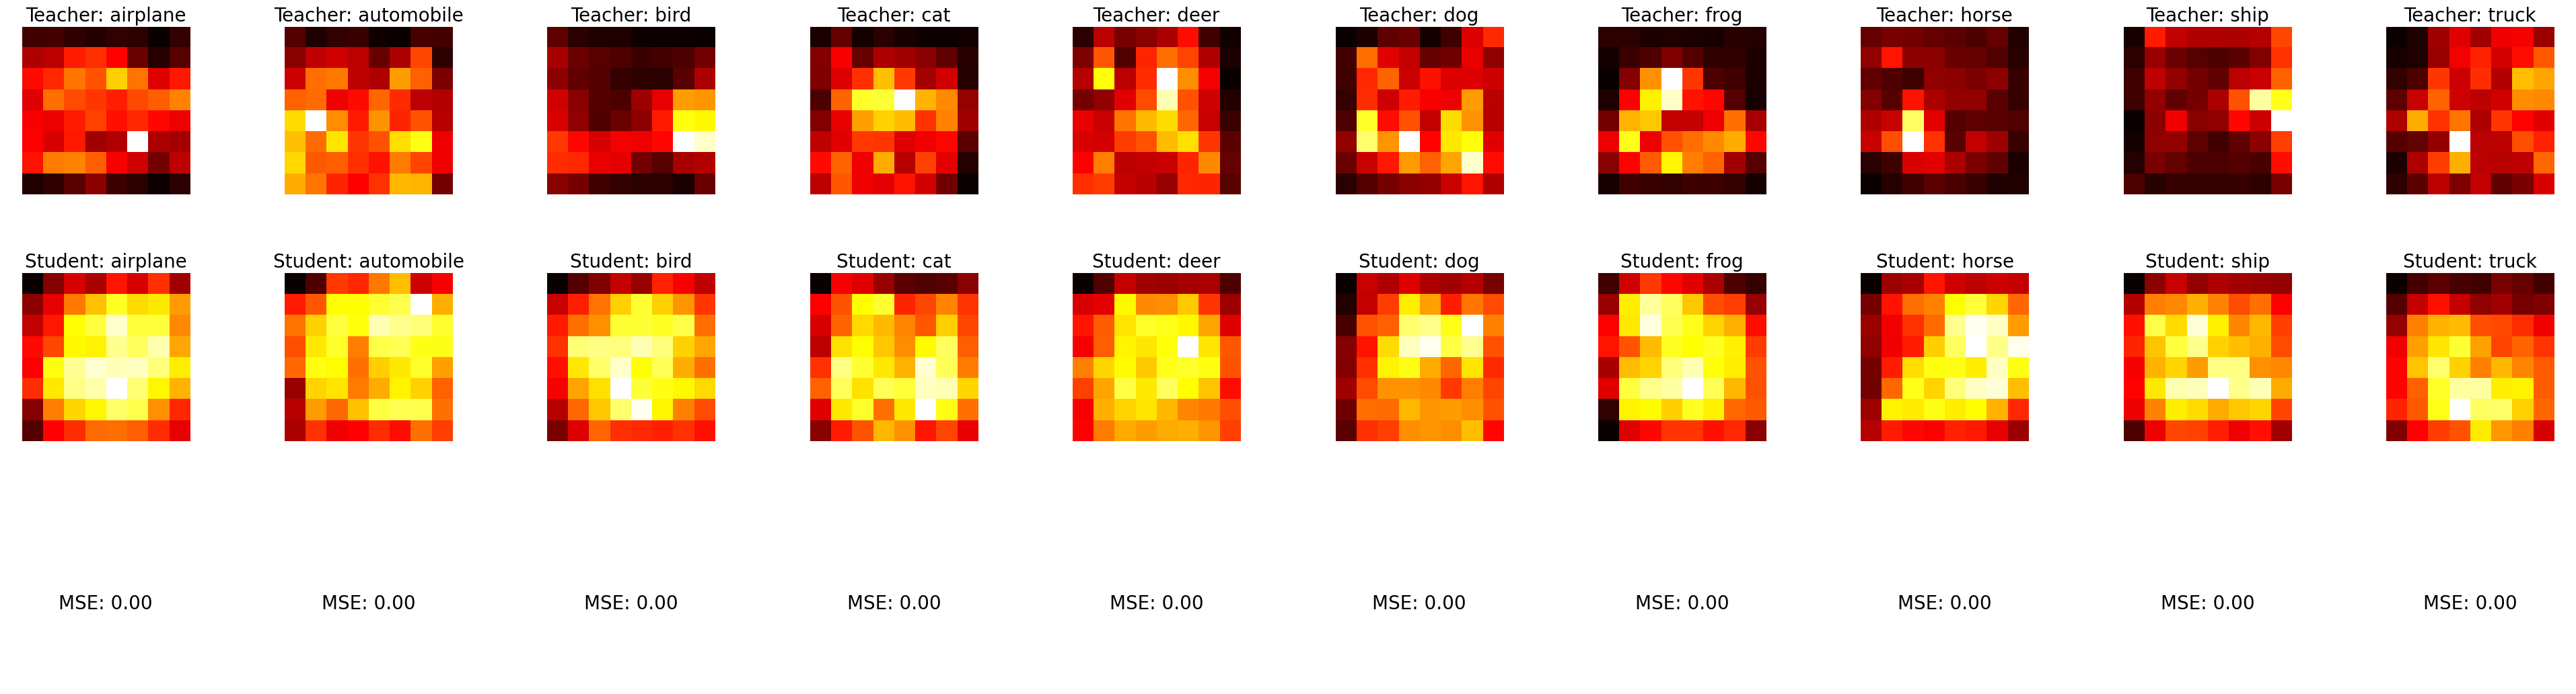

In [26]:
compare_attn_maps(Student, train_loader, device)